In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Download Data

Source: Kaggle [Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews)

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("christopheiv/winemagdata130k")

print("Path to dataset files:", path)

Path to dataset files: /Users/patrick/.cache/kagglehub/datasets/christopheiv/winemagdata130k/versions/1


## Explore Data

In [3]:
fname = "winemag-data-130k-v2.csv"
reviews = pd.read_csv(os.path.join(path, fname))
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [4]:
reviews.head(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [5]:
reviews.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [6]:
reviews.nunique().sort_values()

taster_twitter_handle        15
region_2                     17
taster_name                  19
points                       21
country                      43
price                       390
province                    425
variety                     707
region_1                   1229
winery                    16757
designation               37979
title                    118840
description              119955
Unnamed: 0               129971
dtype: int64

In [7]:
reviews.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [8]:
numerical_features = (
    reviews.select_dtypes(np.number).columns.drop(["Unnamed: 0"]).to_list()
)
numerical_features

['points', 'price']

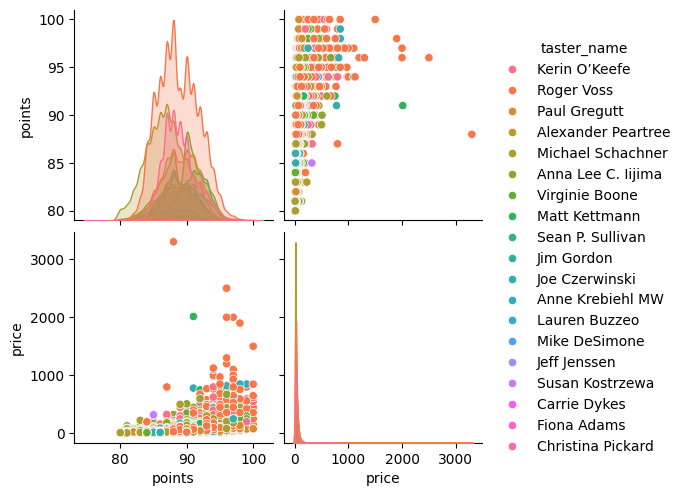

In [9]:
sns.pairplot(reviews[numerical_features + ["taster_name"]], hue="taster_name")

In [10]:
categorical_features = (
    reviews.select_dtypes(object).columns.drop(["description"]).to_list()
)
categorical_features

['country',
 'designation',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

In [11]:
reviews.columns[reviews.nunique() < 50]

Index(['country', 'points', 'region_2', 'taster_name',
       'taster_twitter_handle'],
      dtype='object')

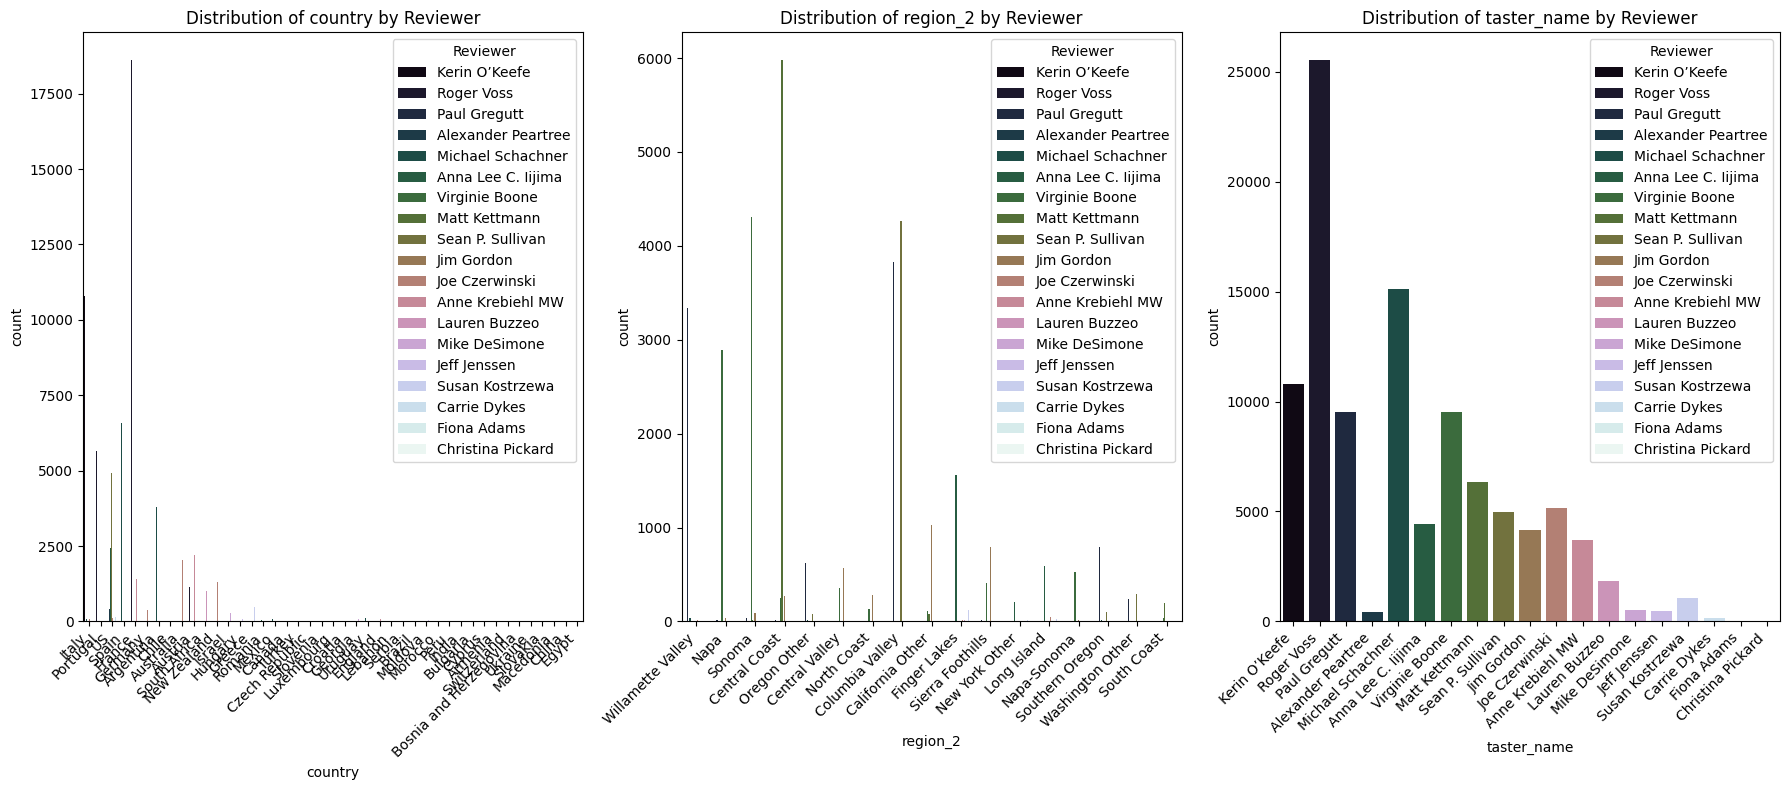

In [12]:
# Set up the plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
axes = axes.flatten()

# Plotting the distribution of each categorical feature with respect to Revenue
for i, col in enumerate(
    reviews.columns[reviews.nunique() < 50].drop(["taster_twitter_handle", "points"])
):
    sns.countplot(
        x=col,
        hue="taster_name",
        data=reviews[
            reviews.columns[reviews.nunique() < 50].drop(
                ["taster_twitter_handle", "points"]
            )
        ],
        ax=axes[i],
        palette="cubehelix",
    )
    axes[i].set_title(f"Distribution of {col} by Reviewer")
    axes[i].legend(title="Reviewer", loc="upper right")
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right")

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()

## Feature Extraction

In [13]:
import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]  

True

In [14]:
reviews[["description"]].sample(10)

,description
85918,"With a touch of toast and plenty of spice, thi..."
87356,"Lightweight and pleasant, this has modest cher..."
72471,"Redolent of peach, lemon soda and crushed flin..."
49242,Tropical fruit and melon aromas are basic but ...
118588,"All Pinot Noir, fermented in neutral oak and p..."
109593,This has bright raspberry and almost-sweet bla...
69059,"Vibrant aromas of pineapple, kiwi and gummy be..."
60816,"Herbal and foresty up front, this Bordeaux ble..."
80467,"Tasting mature for a 10-Year-Old tawny, this r..."
35556,"Expansive and generous on the nose, this has a..."


In [15]:
import wordcloud as wc


# Function for display frquency of words
def freq_words(words, title=""):
    """
    Show frequency of words as an image
    """
    # Generate frequency of words as an image
    freq_words_img = wc.WordCloud(background_color="white", random_state=2).generate(
        words
    )
    print(freq_words_img.words_)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(freq_words_img)
    plt.axis("off")
    plt.show()

{'Earthy': 1.0, 'underbrush': 1.0, 'leather': 1.0, 'scorched': 1.0, 'earth': 1.0, 'dark': 1.0, 'spice': 1.0, 'toasted': 1.0, 'hazelnut': 1.0, 'aromas': 1.0, 'lead': 1.0, 'way': 1.0, 'firm': 1.0, 'palate': 1.0, 'shows': 1.0, 'dried': 1.0, 'cherry': 1.0, 'licorice': 1.0, 'tobacco': 1.0, 'flavors': 1.0, 'alongside': 1.0, 'assertive': 1.0, 'fine': 1.0, 'grained': 1.0, 'tannins': 1.0, 'Drink': 1.0}


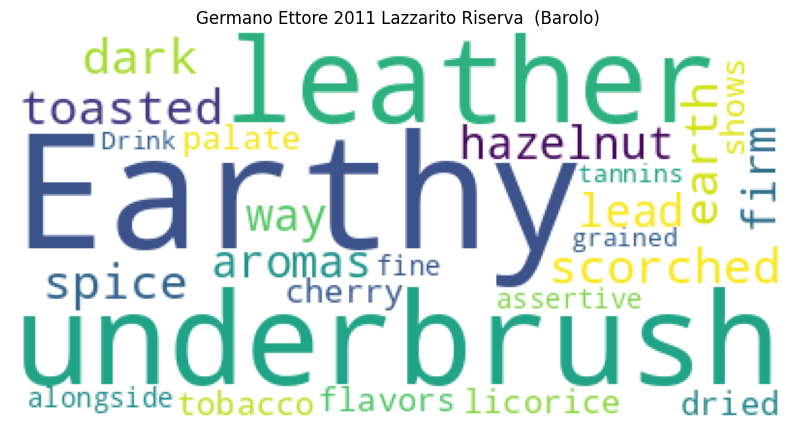

In [16]:
review = next(
    reviews[["title", "description"]].sample(1, random_state=925).itertuples()
)

freq_words(review.description, review.title)

In [17]:
desc = reviews["description"]
desc.head(10)

0    Aromas include tropical fruit, broom, brimston...
1    This is ripe and fruity, a wine that is smooth...
2    Tart and snappy, the flavors of lime flesh and...
3    Pineapple rind, lemon pith and orange blossom ...
4    Much like the regular bottling from 2012, this...
5    Blackberry and raspberry aromas show a typical...
6    Here's a bright, informal red that opens with ...
7    This dry and restrained wine offers spice in p...
8    Savory dried thyme notes accent sunnier flavor...
9    This has great depth of flavor with its fresh ...
Name: description, dtype: object

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patrick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/patrick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/patrick/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/patrick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'earthy': 1.0, 'underbrush': 1.0, 'leather': 1.0, 'scorch': 1.0, 'earth': 1.0, 'dark': 1.0, 'spice': 1.0, 'toast': 1.0, 'hazelnut': 1.0, 'aroma': 1.0, 'lead': 1.0, 'way': 1.0, 'firm': 1.0, 'dry': 1.0, 'cherry': 1.0, 'licorice': 1.0, 'tobacco': 1.0, 'alongside': 1.0, 'assertive': 1.0, 'fine': 1.0, 'grain': 1.0, 'tannin': 1.0}


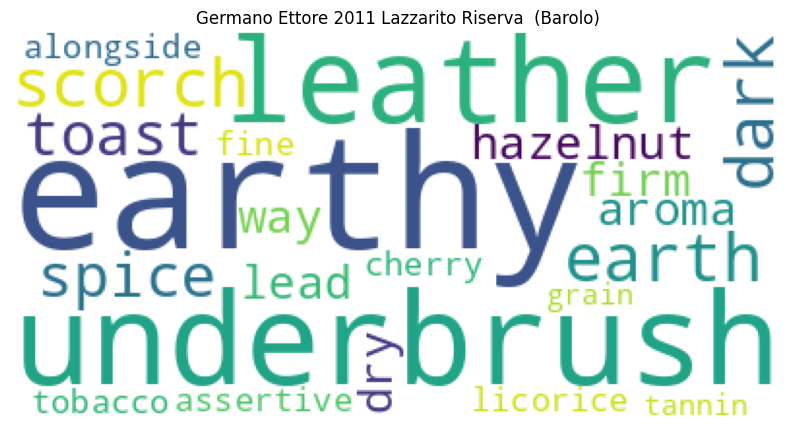

In [18]:
from utils.text_utils import remove_num_punc, remove_stop_words, lemmatize_words

review = next(
    reviews[["title", "description"]].sample(1, random_state=925).itertuples()
)

desc = pd.Series(review.description)
desc = desc.apply(remove_num_punc)
desc = desc.apply(remove_stop_words)
desc = desc.apply(lemmatize_words)

freq_words(desc.values[0], review.title)